In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from acquire import get_titanic_data
from prepare import prep_titanic, split_data

# Random Forests
What is it?
- a machine learning algorithm used for predicting categorical target variables
- Pipeline: Plan - Acquire - Prepare - Explore - **Model** - Deliver

How do we use it?
- acquire, prepare, explore our data
- split data for modeling
- build models on train
    - create rules based on our input data
- evaluate models on train & validate
    - see how our rules work on unseen data
- pick best of the best model, and evaluate bestest model on test

random forest hyperparameters
- n_estimators: The number of trees in the forest (default=100)
- bootstrap: whether bootstrap samples are used when building trees (default=True)
- random_state: controls randomness of bootstrapping samples (default=None)

seen before
- criterion (default=”gini”)
- max_depth (default=None)
- min_samples_split (default=2)
- min_samples_leaf (default=1)
- max_leaf_nodes (default= None)

## Exercises
work with `titanic` data

In [2]:
df = get_titanic_data()
df = prep_titanic(df)
tr,v,t = split_data(df,'survived')
tr.sample()

csv file found and loaded
data cleaned and prepped
data split
train -> (534, 11); 59.93%
validate -> (178, 11); 19.98%
test -> (179, 11); 20.09%


,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
550,1,1,male,0,2,110.8833,C,0,1,0,0


In [3]:
Xtr = tr.drop(columns=['survived','sex','embarked'])
Xv = v.drop(columns=['survived','sex','embarked'])
Xt = t.drop(columns=['survived','sex','embarked'])
ytr = tr.survived
yv = v.survived
yt = t.survived

In [4]:
Xtr.sample()

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
217,2,1,0,27.0,0,1,0,1


In [5]:
ytr.sample()

337    1
Name: survived, dtype: int64

In [6]:
baseline = (ytr==0).mean()
baseline

0.6161048689138576

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the `random_state` accordingly and setting `min_samples_leaf` = 1 and `max_depth` = 10.

In [7]:
rf = RandomForestClassifier(min_samples_leaf=1,max_depth=10,random_state=42)
rf.fit(Xtr,ytr)
y_pred = rf.predict(Xtr)
y_prob = rf.predict_proba(Xtr)
rf.feature_importances_

array([0.11106251, 0.05307524, 0.06396437, 0.39850609, 0.02432817,
       0.29892752, 0.01562892, 0.03450717])

In [8]:
Xtr.columns

Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')

### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [9]:
rf.score(Xtr,ytr)

0.9269662921348315

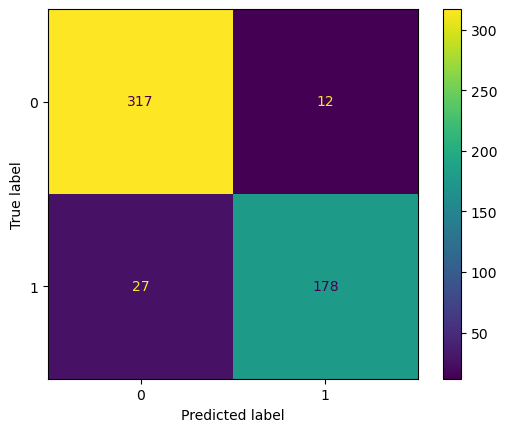

In [10]:
ConfusionMatrixDisplay(confusion_matrix(ytr,y_pred,labels=rf.classes_),display_labels=rf.classes_).plot()
plt.show()

In [11]:
pd.DataFrame(classification_report(ytr,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.921512,0.936842,0.926966,0.929177,0.927397
recall,0.963526,0.868293,0.926966,0.915909,0.926966
f1-score,0.942051,0.901266,0.926966,0.921658,0.926393
support,329.000000,205.000000,0.926966,534.000000,534.000000


### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [12]:
TN, FP, FN, TP = confusion_matrix(ytr, y_pred).ravel()
TN, FP, FN, TP

(317, 12, 27, 178)

In [13]:
act_neg = TN + FP
act_pos = FN + TP
print(f"Actual Negative: {act_neg}")
print(f"Actual Positive: {act_pos}")
print(ytr.value_counts())

Actual Negative: 329
Actual Positive: 205
0    329
1    205
Name: survived, dtype: int64


In [14]:
ALL = TN + FP + FN + TP
acc = (TP+TN)/ALL
tru_pos = rec = TP/(TP+FN)
fal_pos = FP/(FP+TN)
tru_neg = TN/(FP+TN)
fal_neg = FN/(TP+FN)
prc = TP/(TP+FP)
f1_score = 2*(prc*rec)/(prc+rec)
sup_pos = TP+FN
sup_neg = FP+TN

print(f"Accuracy: {acc}")
print(f"True Pos Rate: {tru_pos}")
print(f"False Pos Rate: {fal_pos}")
print(f"True Neg Rate: {tru_neg}")
print(f"False Neg Rate: {fal_neg}")
print(f"Precision: {prc}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1_score}")
print(f"Support Pos (1): {sup_pos}")
print(f"Support Neg (0): {sup_neg}")

Accuracy: 0.9269662921348315
True Pos Rate: 0.8682926829268293
False Pos Rate: 0.0364741641337386
True Neg Rate: 0.9635258358662614
False Neg Rate: 0.13170731707317074
Precision: 0.9368421052631579
Recall: 0.8682926829268293
F1 Score: 0.90126582278481
Support Pos (1): 205
Support Neg (0): 329


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [15]:
rf = RandomForestClassifier(min_samples_leaf=1,max_depth=10,random_state=42)
rf.fit(Xtr,ytr)
y_pred = rf.predict(Xtr)
y_prob = rf.predict_proba(Xtr)
rf.feature_importances_

array([0.11106251, 0.05307524, 0.06396437, 0.39850609, 0.02432817,
       0.29892752, 0.01562892, 0.03450717])

In [16]:
import itertools
metrics = []
for l, d in itertools.product(range(1,21), range(1,11)):
    # model
    rf = RandomForestClassifier(min_samples_leaf=l,max_depth=d,random_state=42)
    rf.fit(Xtr,ytr)
    y_acc = rf.score(Xtr,ytr)
    # table-ize
    output = {
        'min_leaf':l,
        'max_depth':d,
        'train_acc':y_acc
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df.sort_values(by=['train_acc'], ascending=False)

,min_leaf,max_depth,train_acc
9,1,10,0.926966
8,1,9,0.925094
7,1,8,0.908240
6,1,7,0.900749
19,2,10,0.882022
...,...,...,...
150,16,1,0.749064
160,17,1,0.749064
20,3,1,0.749064
180,19,1,0.747191


### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [17]:
# min_sample_leaf=1 and max_depth=10 give the best accuracy of 92.7%

### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [18]:
metrics = []
for l, d in itertools.product(range(1,21), range(1,11)):
    # model
    rf = RandomForestClassifier(min_samples_leaf=l,max_depth=d,random_state=42)
    rf.fit(Xtr,ytr)
    ytr_acc = rf.score(Xtr,ytr)
    yv_acc = rf.score(Xv,yv)
    # table-ize
    output = {
        'min_leaf':l,
        'max_depth':d,
        'train_acc':ytr_acc,
        'val_acc':yv_acc
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df['diff'] = df.train_acc - df.val_acc
df.sort_values(by=['val_acc'], ascending=False).head(10)

,min_leaf,max_depth,train_acc,val_acc,diff
72,8,3,0.810861,0.842697,-0.031835
52,6,3,0.810861,0.837079,-0.026217
62,7,3,0.810861,0.837079,-0.026217
23,3,4,0.825843,0.837079,-0.011236
24,3,5,0.835206,0.837079,-0.001873
4,1,5,0.838951,0.837079,0.001873
3,1,4,0.831461,0.837079,-0.005618
42,5,3,0.814607,0.831461,-0.016854
102,11,3,0.808989,0.831461,-0.022472
92,10,3,0.810861,0.831461,-0.020599


In [19]:
rf = RandomForestClassifier(min_samples_leaf=8,max_depth=3,random_state=42)
rf.fit(Xtr,ytr)
baseline,rf.score(Xtr,ytr),rf.score(Xv,yv),rf.score(Xt,yt)

(0.6161048689138576,
 0.8108614232209738,
 0.8426966292134831,
 0.7988826815642458)

Extra practice on telco

In [20]:
from acquire import get_telco_data
from prepare import prep_telco

In [21]:
df = get_telco_data()
df = prep_telco(df)
tr,v,t = split_data(df,'churn')
tr.sample()

csv file found and loaded
data cleaned and prepped
data split
train -> (4225, 47); 59.99%
validate -> (1409, 47); 20.01%
test -> (1409, 47); 20.01%


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
729,Male,1,Yes,No,16,Yes,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0


In [22]:
tel_obj = tr.select_dtypes(include='object').columns.to_list()
tel_obj.append('churned')
Xtr = tr.drop(columns=tel_obj)
Xv = v.drop(columns=tel_obj)
Xt = t.drop(columns=tel_obj)
ytr = tr.churned
yv = v.churned
yt = t.churned

In [23]:
Xtr.sample()

,senior_citizen,tenure,monthly_charges,total_charges,Female,partnered,has_dependents,has_phone_service,does_paperless_billing,multiple_lines_No phone service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4192,0,2,20.05,42.7,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [24]:

ytr.sample()

6544    0
Name: churned, dtype: int64

In [25]:
baseline = (ytr==0).mean()
baseline

0.7346745562130178

In [26]:
rf = RandomForestClassifier(min_samples_leaf=1,max_depth=10,random_state=42)
rf.fit(Xtr,ytr)
y_pred = rf.predict(Xtr)

array([0.01498316, 0.18257937, 0.1169209 , 0.17370885, 0.01738696,
       0.01790279, 0.01616232, 0.00415143, 0.02747499, 0.00560856,
       0.01780216, 0.00811465, 0.02854304, 0.01127243, 0.01641933,
       0.00692174, 0.0132477 , 0.01239642, 0.03301194, 0.01202882,
       0.01502976, 0.00762414, 0.01138767, 0.03120987, 0.04977647,
       0.05662229, 0.0092633 , 0.010252  , 0.0621921 , 0.01000484])

In [27]:
pd.DataFrame[[Xtr.columns],[rf.feature_importances_]]

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'Female', 'partnered', 'has_dependents', 'has_phone_service',
       'does_paperless_billing', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check'],
      dtype='object')